In [3]:
import keras
keras.__version__

'2.8.0'

In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [16]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 58ms/step - loss: 0.4528 - acc: 0.8269 - val_loss: 0.3361 - val_acc: 0.8819
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2609 - acc: 0.9086 - val_loss: 0.2843 - val_acc: 0.8884
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2001 - acc: 0.9280 - val_loss: 0.2933 - val_acc: 0.8803
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1663 - acc: 0.9408 - val_loss: 0.2998 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1400 - acc: 0.9516 - val_loss: 0.3235 - val_acc: 0.8764
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1215 - acc: 0.9594 - val_loss: 0.3455 - val_acc: 0.8720
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1040 - acc: 0.9642 - val_loss: 0.3935 - val_acc: 0.8616
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0896 - a

In [17]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 64ms/step - loss: 0.5285 - acc: 0.8073 - val_loss: 0.4225 - val_acc: 0.8637
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3331 - acc: 0.8970 - val_loss: 0.3265 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2544 - acc: 0.9174 - val_loss: 0.2938 - val_acc: 0.8893
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2136 - acc: 0.9294 - val_loss: 0.2865 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1873 - acc: 0.9376 - val_loss: 0.2822 - val_acc: 0.8874
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1683 - acc: 0.9444 - val_loss: 0.2841 - val_acc: 0.8870
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1522 - acc: 0.9497 - val_loss: 0.2991 - val_acc: 0.8811
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1395 - a

In [12]:
original_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
smaller_model_hist.history.keys()

In [25]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

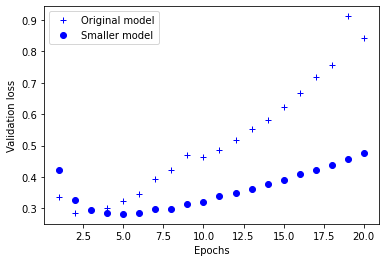

In [26]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#Define a bigger model and compare it with orginal model

In [18]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [19]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 19s 378ms/step - loss: 0.4567 - acc: 0.8071 - val_loss: 0.4519 - val_acc: 0.8046
Epoch 2/20
49/49 [==============================] - 17s 340ms/step - loss: 0.2288 - acc: 0.9086 - val_loss: 0.2747 - val_acc: 0.8878
Epoch 3/20
49/49 [==============================] - 16s 338ms/step - loss: 0.1310 - acc: 0.9506 - val_loss: 0.3495 - val_acc: 0.8771
Epoch 4/20
49/49 [==============================] - 17s 339ms/step - loss: 0.0657 - acc: 0.9787 - val_loss: 0.5338 - val_acc: 0.8263
Epoch 5/20
49/49 [==============================] - 16s 335ms/step - loss: 0.0647 - acc: 0.9869 - val_loss: 0.4727 - val_acc: 0.8827
Epoch 6/20
49/49 [==============================] - 16s 336ms/step - loss: 0.0382 - acc: 0.9907 - val_loss: 0.4773 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 17s 340ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.7597 - val_acc: 0.8813
Epoch 8/20
49/49 [==============================] - 17s 340ms/step - 

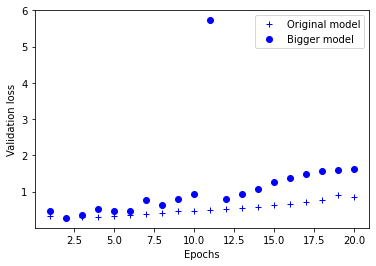

In [27]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

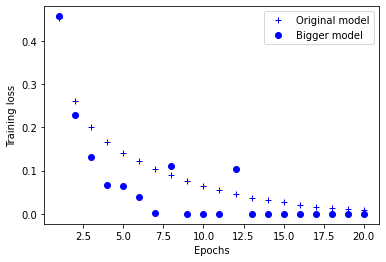

In [28]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [2]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

NameError: ignored

In [30]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [1]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

NameError: ignored

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [1]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [7]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1]


After applying dropout, this vector will have a few zero entries
distributed at random: 
for example, [0, 0.5, 1.3, 0, 1.1].

In [8]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.6152 - acc: 0.6615 - val_loss: 0.4789 - val_acc: 0.8475
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.4608 - acc: 0.8064 - val_loss: 0.3450 - val_acc: 0.8818
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3616 - acc: 0.8667 - val_loss: 0.2954 - val_acc: 0.8865
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2968 - acc: 0.8968 - val_loss: 0.2788 - val_acc: 0.8884
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2554 - acc: 0.9135 - val_loss: 0.2783 - val_acc: 0.8886
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2257 - acc: 0.9230 - val_loss: 0.2888 - val_acc: 0.8876
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2015 - acc: 0.9351 - val_loss: 0.3208 - val_acc: 0.8808
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1797 - a

In [10]:
dpt_model_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Let's plot the results:

In [14]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

NameError: ignored

#The universal workflow of neural network learning
1. Defining the problem and assembling a dataset
2. Choosing a measure of success
3. Deciding on an evaluation protocol
4. Preparing your data
5. Developing a model that does better than a baseline
6. Scaling up: developing a model that overfits
7. Regularizing your model and tuning your hyperparameters

